In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#model
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
train_space = pd.read_csv('train.csv')
test_space = pd.read_csv('train.csv')

In [3]:
train_space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
201/8693

0.023122052225928908

In [5]:
nan_counts = train_space.isna().sum()

# Display the number of NaN values and the columns where they are
print("Number of NaN values in each column:")
print(nan_counts)



Number of NaN values in each column:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
for column in train_space.columns:
    # Count NaN values for each column
    #nan_count = train_space[column].isna().sum()
    values = train_space[column].value_counts() 
    
    # Display the results
    print(f"Values '{column}': {values}\n" )

Values 'PassengerId': PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64

Values 'HomePlanet': HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

Values 'CryoSleep': CryoSleep
False    5439
True     3037
Name: count, dtype: int64

Values 'Cabin': Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

Values 'Destination': Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

Values 'Age': Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

Values 'VIP': VIP
False    8291
True      199
Name: count, d

In [7]:
train_space = train_space.dropna()
train_space
#train_space['CryoSleep'] = train_space['CryoSleep'].map({'True': 0, 'False': 1})
#train_space['VIP'] = train_space['VIP'].map({'True': 0, 'False': 1})
#train_space['Transported'] = train_space['Transported'].map({'True': 0, 'False': 1})
train_space = train_space.drop(['Name','Cabin'], axis=1)
#new_train_space['Age'].fillna(np.mean(new_train_space['Age']), inplace=True)
train_space = pd.get_dummies(train_space, columns=['HomePlanet', 'Destination'])
train_space

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,True
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,False,False,False,False,True
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,False,False,True
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,False,False,True
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,False,True,False,True,False,False
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,True,False,False,False,False,True
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,False,True,False,True,False,False


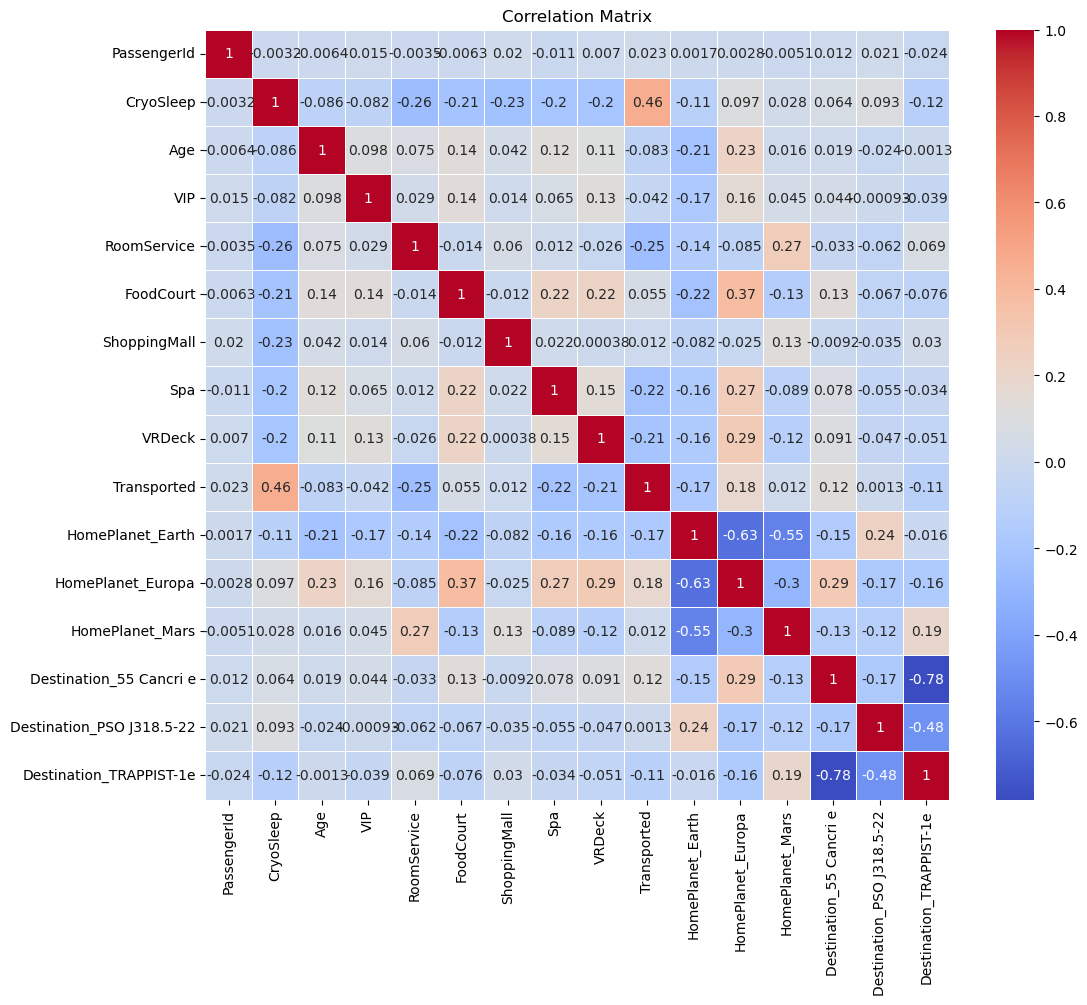

In [8]:
# Create a correlation matrix
train_space_corr = train_space.dropna()
correlation_matrix = train_space_corr.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# high correlation between transported and CyroSleep, RoomService, Spa, VRDeck, ShoppingMall, HomePlanet_Earth,
#HomePlanet_Europa, HomePlanet_Mars, Destination_55_Cancri e, Destination_TRAPPIST-1e, Destination_PSO J318.5-22

high_corr_columns = ['PassengerId', 'CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet_Earth',
                      'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e',
                      'Destination_PSO J318.5-22', 'Transported']

# Create a DataFrame with selected columns
df = train_space[high_corr_columns]
df.head()

,PassengerId,CryoSleep,RoomService,Spa,VRDeck,ShoppingMall,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_TRAPPIST-1e,Destination_PSO J318.5-22,Transported
0,0001_01,False,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False
1,0002_01,False,109.0,549.0,44.0,25.0,True,False,False,False,True,False,True
2,0003_01,False,43.0,6715.0,49.0,0.0,False,True,False,False,True,False,False
3,0003_02,False,0.0,3329.0,193.0,371.0,False,True,False,False,True,False,False
4,0004_01,False,303.0,565.0,2.0,151.0,True,False,False,False,True,False,True


In [10]:
x = df[['PassengerId', 'CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet_Earth',
                      'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e',
                      'Destination_PSO J318.5-22']]
y = df['Transported']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## First Model - Random Forrest

In [ ]:
# Print the best estimator, best parameters, and best score
print("Best Estimator:", GS.best_estimator_)
print("Best Parameters:", GS.best_params_)
print("Best Score:", GS.best_score_)

# Access the average score directly
average_score = GS.cv_results_['mean_test_score'][GS.best_index_]
print("Average Score:", average_score)

In [ ]:
brf_model = GS.best_estimator_

# Fit the model on the training data
brf_model.fit(X_train, y_train)

# Make predictions on the test set
brf_predictions = brf_model.predict(x_test)

# Evaluate the accuracy of the Bootstrap Random Forest model
brf_accuracy = accuracy_score(y_test, brf_predictions)

print("Bootstrap Random Forest Accuracy:", brf_accuracy)

***
## Preperation for Submission

In [ ]:
test_space.head()

In [ ]:
test_space.isna().sum()

In [ ]:
#train_space = train_space.dropna()
#train_space['CryoSleep'] = train_space['CryoSleep'].map({'True': 0, 'False': 1})
#train_space['VIP'] = train_space['VIP'].map({'True': 0, 'False': 1})
#train_space['Transported'] = train_space['Transported'].map({'True': 0, 'False': 1})
test_space = test_space.drop(['Name','Cabin'], axis=1)
#new_train_space['Age'].fillna(np.mean(new_train_space['Age']), inplace=True)
test_space = pd.get_dummies(train_space, columns=['HomePlanet', 'Destination'])
test_space

In [ ]:
x = test_space[['PassengerId', 'CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet_Earth',
                      'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e',
                      'Destination_PSO J318.5-22']]
#y = df['Transported']

In [ ]:
test_space.isna().sum()

***
## Backup

In [ ]:
import sys

sys.exit("Execution stopped by user")

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [ None, 'balanced', {0: 1, 1: 577 / 314}],  # Adjusted class weights #None, 'balanced',
    'random_state': [42],
    'bootstrap': [True, False]
}

# Define the scoring metrics (F1 score, AUC score, and accuracy)
scoring = {
    'F1 Score': make_scorer(f1_score),
    'AUC': make_scorer(roc_auc_score),
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score)
}

GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = param_grid_rf,
                  scoring = scoring, #sklearn.metrics.SCORERS.keys()
                  refit = "Accuracy",
                  cv = 5,
                  verbose = 4)
#GS.fit(X_train, y_train)
GS.fit(x, y)